# NCEM

Input:
 - Hartmann raw-data in correct file and directory structure as described in `hartmann_data-preparation.ipynb`

Output:
 - Sender_receiver_effects matrix
   - A cell-type x cell-type x features matrix with the interaction terms representing the sender-receiver effects between cells
 - Custom sender_receiver_effects() matrices
    1. L1 norm of indicator function of significant sender-receiver interactions on feature-level
        - In other words, for each sender-receiver cell-type pair, the sum of all significant features (hypothesis test on interaction terms: FDR corrected Wald test)
    2. L2 norm of sender-receiver interaction terms on feature-level
        - In other words, for each sender-receiver cell-type pair, the euclidean distance of the data point in all feature dimensions

Outlook:
- Future custom loader

In [1]:
import pickle
import ncem
import sender_receiver_custom as custom

2023-02-09 01:37:49.627020: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-09 01:37:49.803602: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-09 01:37:50.352436: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-09 01:37:50.352483: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

sender_receiver_custom module is loaded!


/home/ifichtner/mambaforge/envs/squidpy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpy/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpy/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 53.02it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



2023-02-09 01:44:34.690201: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 01:44:34.696937: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 01:44:34.697101: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-09 01:44:34.697595: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

using ols parameters.
calculating inv fim.


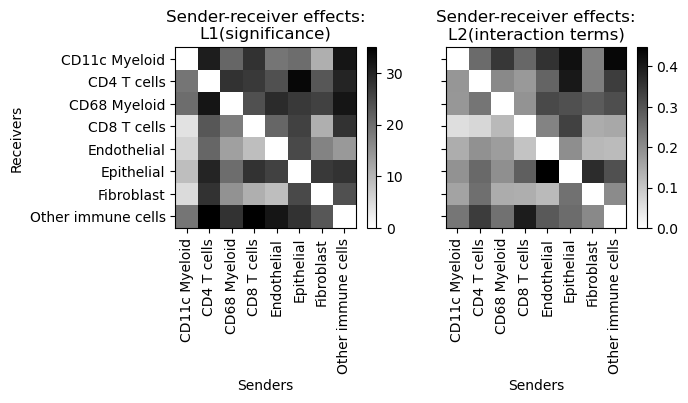

In [4]:
# Applying the function
ncem_interactions = custom.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


# Save the matrices

In [12]:
with open('../output-data/hartmann/ncem/ncem_interactions_output', 'wb') as filehandler:
  pickle.dump(ncem_interactions, filehandler)